In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os
import warnings

warnings.filterwarnings('ignore')
np.random.seed(2021)

In [98]:
df=pd.read_csv("russia_alcohol.csv")
df

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [100]:
df.isna().sum()

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

In [101]:
NA = pd.DataFrame(
    data=[
        df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

,NA Count,NA Percent
brandy,66,4.09%
wine,63,3.90%
champagne,63,3.90%
vodka,61,3.78%
beer,58,3.59%
year,0,0.00%
region,0,0.00%


In [102]:
df.fillna(method="pad", inplace=True)
df.isna().sum()

year         0
region       0
wine         0
beer         0
vodka        0
champagne    0
brandy       0
dtype: int64

In [103]:
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [104]:
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,2007.000000,5.671344,52.021009,11.861368,1.313709,0.527412
std,5.478922,2.812985,25.713115,5.079280,0.786660,0.394540
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.700000,32.700000,8.400000,0.800000,0.200000
50%,2007.000000,5.400000,50.600000,11.600000,1.200000,0.400000
75%,2012.000000,7.400000,68.500000,15.045000,1.685000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [105]:
#list(df['region'].unique())

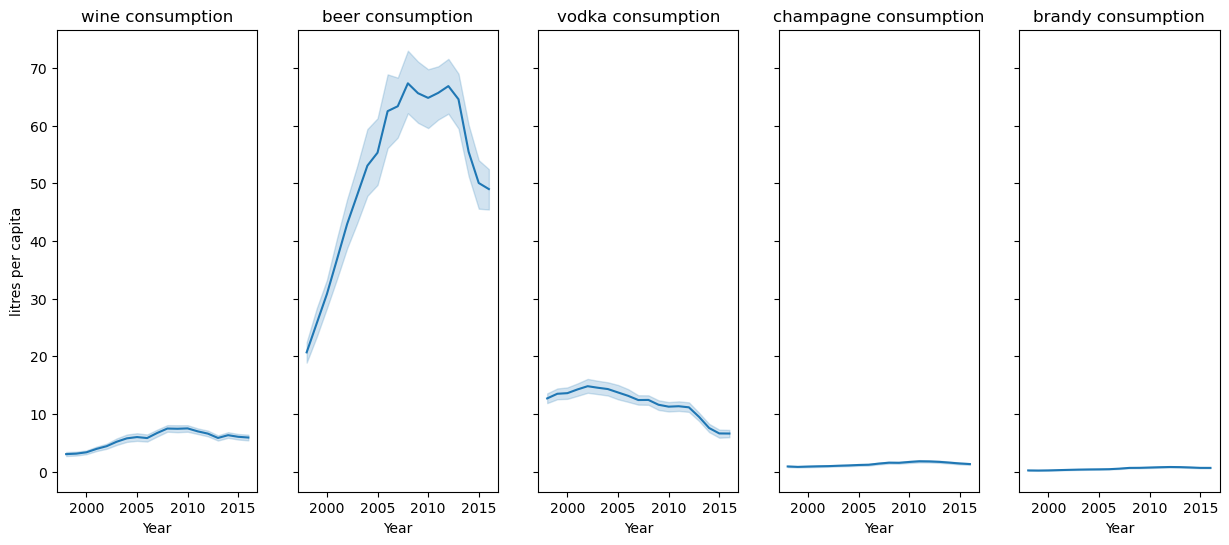

In [106]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharey=True)
for x in range(1, 6, 1):
    column_name = df.columns[x + 1]
    sns.lineplot(data=df, x="year", y=f"{column_name}", ax=axes[x - 1])
    axes[x - 1].set_title(f"{column_name} consumption")
    axes[x - 1].set_xlabel("Year")
    axes[x - 1].set_ylabel("litres per capita")

Text(0.5, 1.0, 'Box Plot')

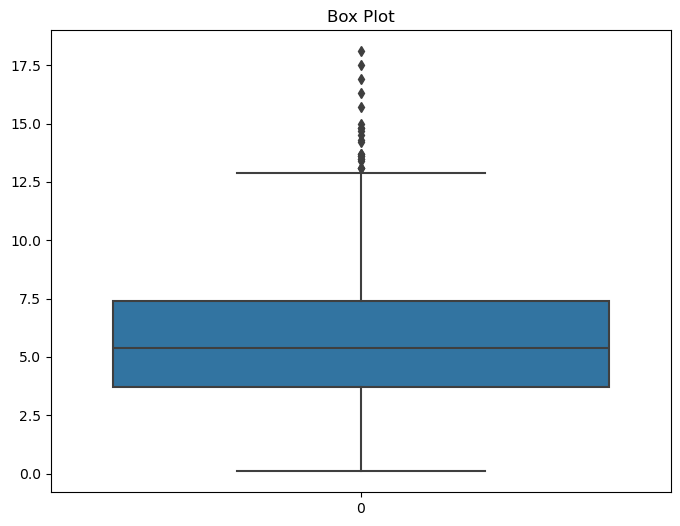

In [107]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['wine'])
plt.title('Box Plot')

Text(0.5, 1.0, 'Box Plot for Numerical Columns')

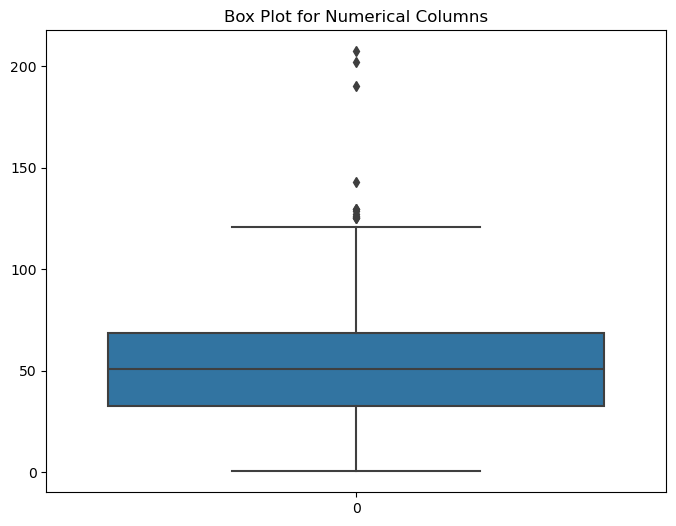

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['beer'])
plt.title('Box Plot for Numerical Columns')

Text(0.5, 1.0, 'Box Plot for Numerical Columns')

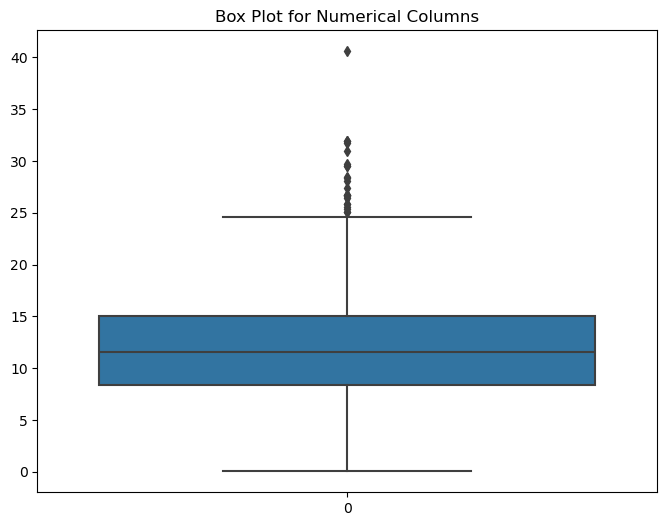

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['vodka'])
plt.title('Box Plot for Numerical Columns')

Text(0.5, 1.0, 'Box Plot for Numerical Columns')

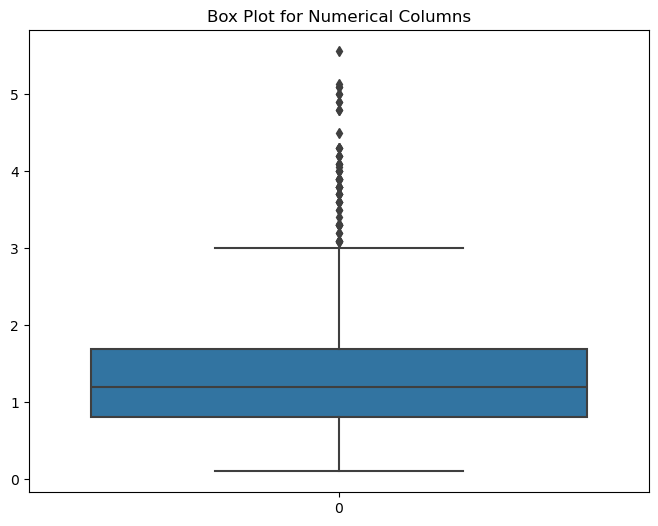

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['champagne'])
plt.title('Box Plot for Numerical Columns')

## PICKING NUMERICAL COLUMNS FROM THE DATASET 

In [111]:
numrical_columns=df.select_dtypes('number')
numrical_columns

,year,wine,beer,vodka,champagne,brandy
0,1998,1.9,8.8,3.4,0.3,0.1
1,1998,3.3,19.2,11.3,1.1,0.1
2,1998,2.1,21.2,17.3,0.7,0.4
3,1998,4.3,10.6,11.7,0.4,0.3
4,1998,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...
1610,2016,5.0,42.3,7.7,0.7,0.4
1611,2016,3.9,34.0,11.6,1.8,1.1
1612,2016,4.3,56.1,8.2,1.8,0.5
1613,2016,4.5,75.8,8.2,1.7,1.3


## BAR PLOTS

Text(0.5, 1.0, 'Box Plot for Numerical Columns')

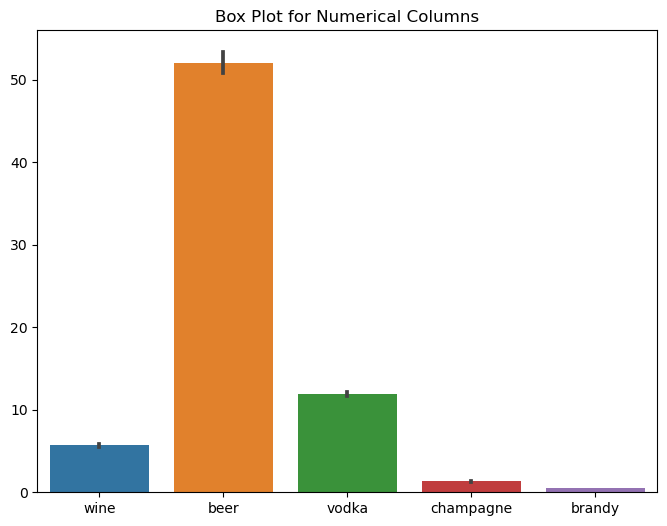

In [112]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df[['wine','beer','vodka','champagne','brandy']],)
plt.title('Box Plot for Numerical Columns')

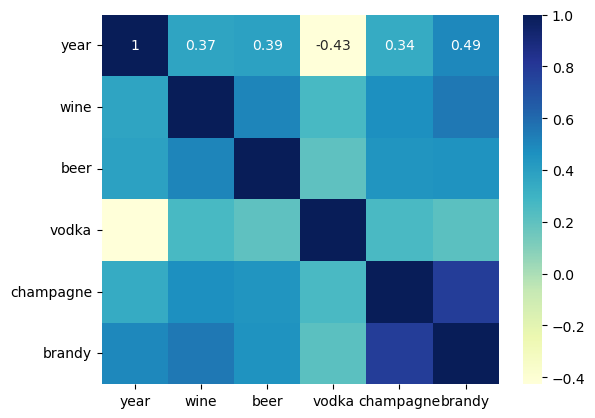

In [113]:
dataplot = sns.heatmap(numrical_columns.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [114]:
numrical_columns.corr()

,year,wine,beer,vodka,champagne,brandy
year,1.000000,0.373094,0.388382,-0.427374,0.341233,0.492639
wine,0.373094,1.000000,0.504466,0.269349,0.467147,0.552824
beer,0.388382,0.504466,1.000000,0.199923,0.447988,0.455728
vodka,-0.427374,0.269349,0.199923,1.000000,0.261818,0.210142
champagne,0.341233,0.467147,0.447988,0.261818,1.000000,0.777556
brandy,0.492639,0.552824,0.455728,0.210142,0.777556,1.000000
